<a href="https://colab.research.google.com/github/melikesifa/assignments/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfFashion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist_fashion_train.csv')
dfFashion.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfFashion.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [4]:
# Define target and features

y = dfFashion['label'].ravel()
X = scale(dfFashion.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Analyze Data

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 9


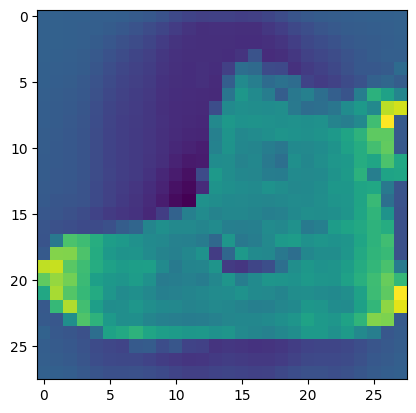

In [ ]:
# Display first image
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

<Axes: ylabel='count'>

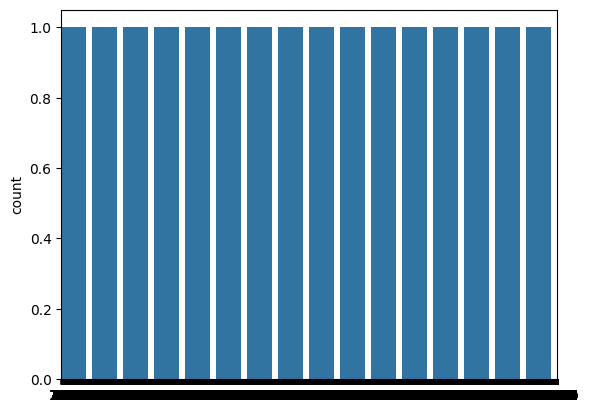

In [ ]:
# Plot count of digit types
sns.countplot(y)

The data set seems fairly balanced.  In other words, there are enough samples of each digit.  If not, we would have needed to re-balance the dataset.

## Predict Digit from Handwriting
Since **SVM** is a tool we already know, let's start with that.

In [ ]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmFashion = SVC()
mdlSvmFashion.fit(X_train, y_train)
y_test_pred = mdlSvmFashion.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.83      0.81      0.82      1232
           3       0.88      0.90      0.89      1209
           4       0.80      0.85      0.83      1159
           5       0.97      0.95      0.96      1217
           6       0.74      0.66      0.70      1178
           7       0.93      0.96      0.95      1215
           8       0.95      0.97      0.96      1178
           9       0.96      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 9min 13s, sys: 2.03 s, total: 9min 15s
Wall time: 9min 21s


While Support Vector Machines create a boundary that maximize the margin between the different classes, it takes a very long time.  Let's attempt a different way of solving this perhaps by mimicing the way we classify images in our brain...

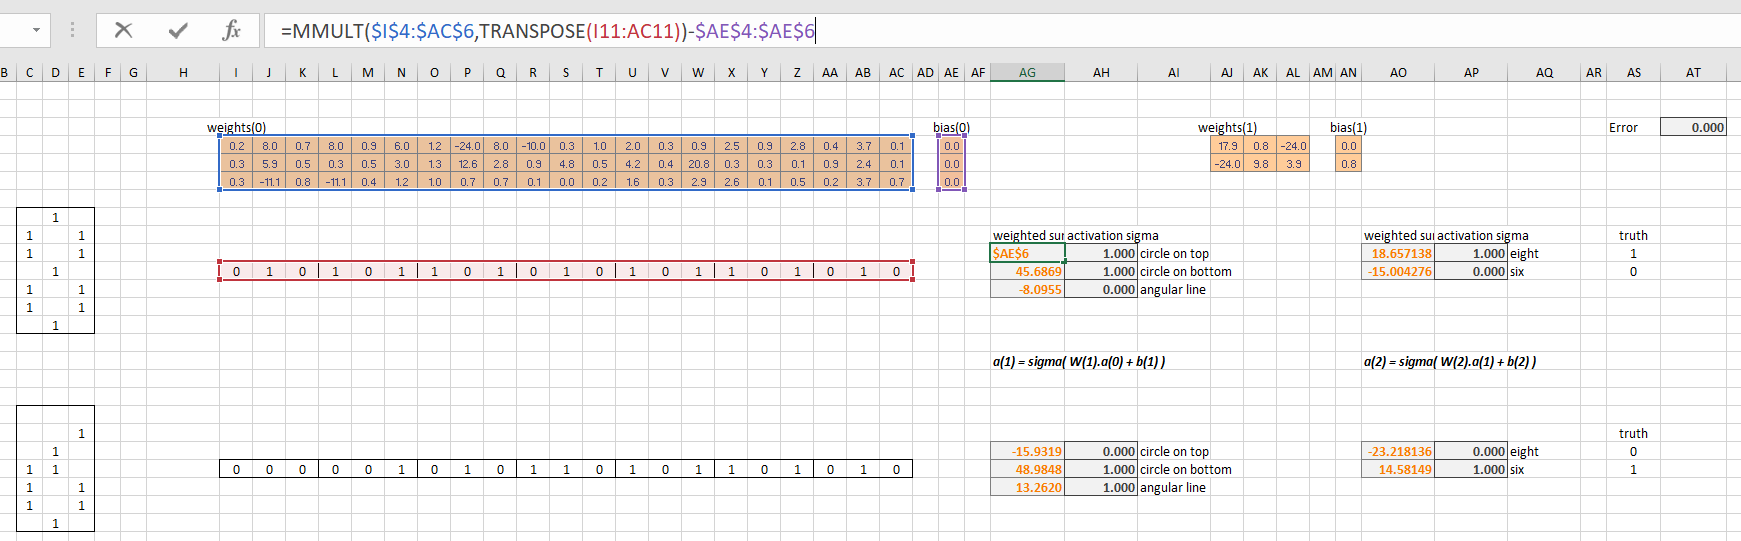

And now, let's solve for the weights and biases using Excel solver.

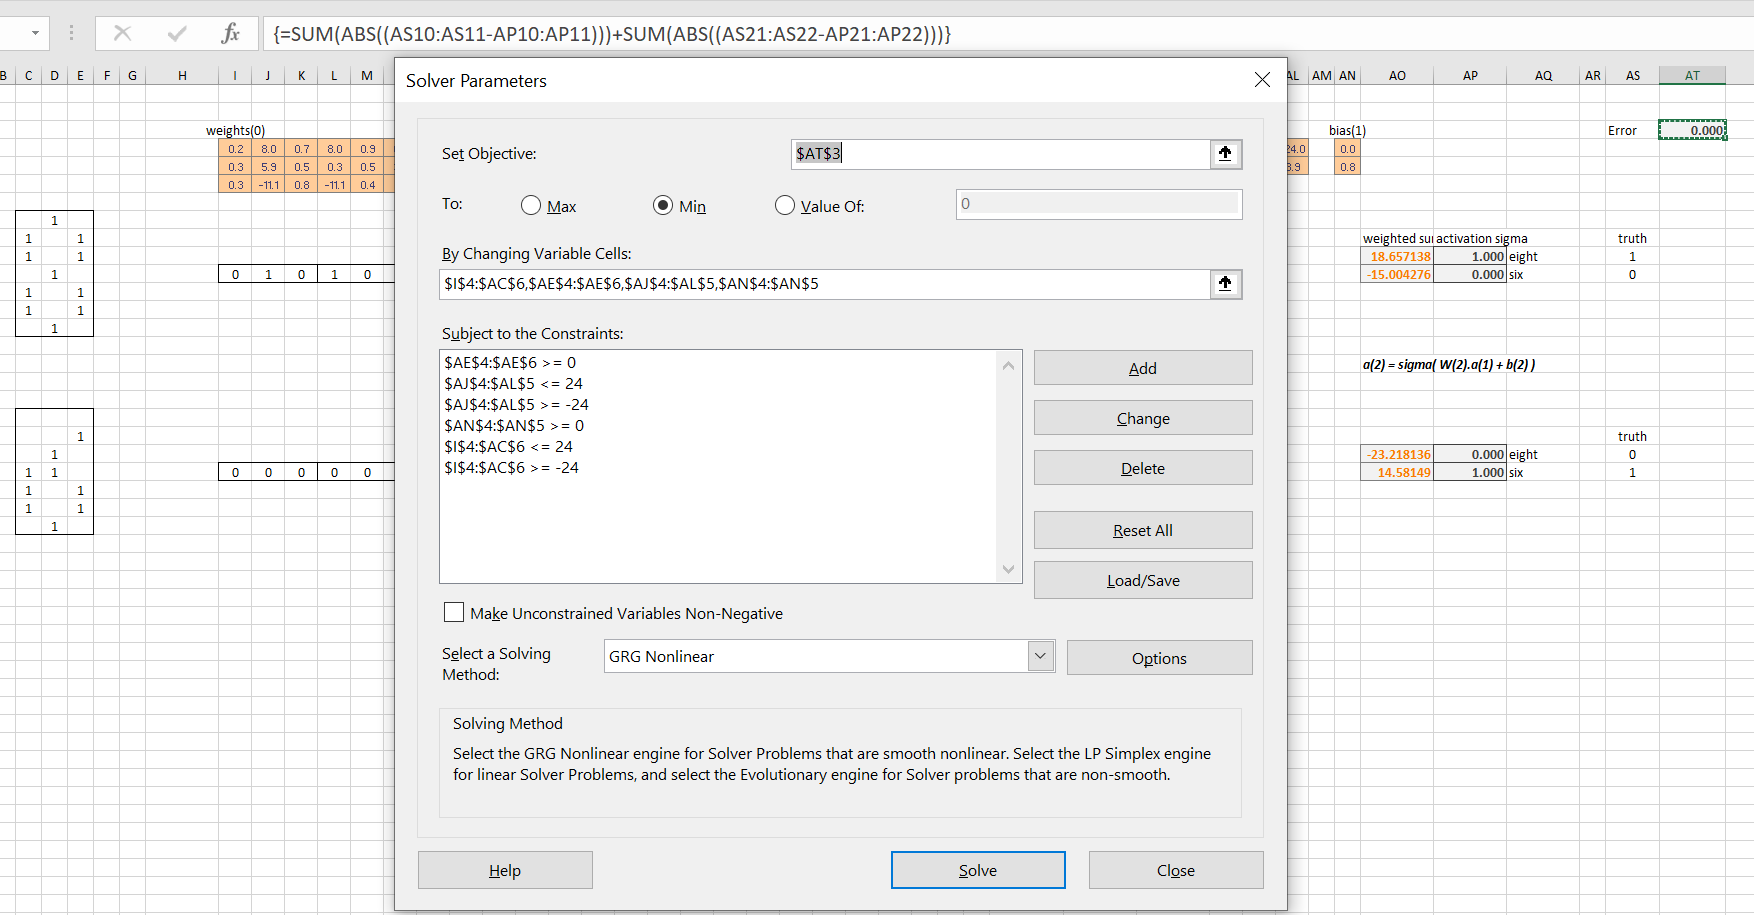

Neural Network libraries are efficient in solving for these weights and biases in large matrices... but they are not very explainable unless you define the layers in a meaningful manner.

In [ ]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncFashion = MLPClassifier()
mdlNncFashion.fit(X_train, y_train)
y_test_pred = mdlNncFashion.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1166
           1       0.97      0.98      0.98      1213
           2       0.78      0.84      0.81      1232
           3       0.90      0.87      0.88      1209
           4       0.81      0.79      0.80      1159
           5       0.97      0.95      0.96      1217
           6       0.74      0.69      0.71      1178
           7       0.94      0.94      0.94      1215
           8       0.96      0.95      0.96      1178
           9       0.94      0.96      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 4min 40s, sys: 1min 47s, total: 6min 27s
Wall time: 4min 8s


Notice the Neural Network took a lot less time to get a more accurate result.  Now, let's see how this performs on data it has never seen before...

In [ ]:
# Load Data for Scoring
X_score = scale(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist_fashion_test.csv', index_col=0)) # Drop the first column (index)

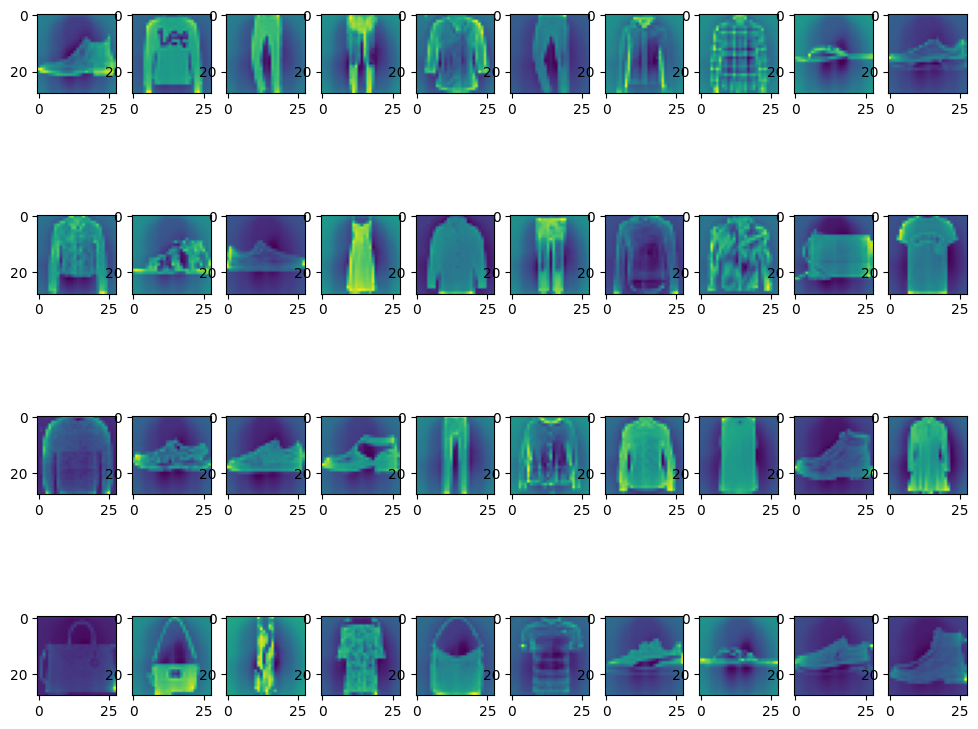

In [ ]:
# View New Handwritten Images
plt.figure(figsize=(12,10))
col, row = 10, 4
for i in range(col*row):
    plt.subplot(row, col, i+1)
    plt.imshow(X_score[i].reshape((28,28)))
plt.show()

In [ ]:
# Show predicted digits
print('Predicted Digits (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncFashion.predict(X_score)[i], end=' ')

Predicted Digits (Neural Network):


9 2 1 1 6 1 4 6 5 7 

4 5 5 3 4 1 2 2 8 0 

2 5 7 5 1 2 6 0 9 6 

8 8 3 3 8 0 7 5 7 9 

Let's see if this result can be further improved by tweaking the network...

utexas_ds_orie_divider_gray.png

### Deep Neural Network

Adding additional hidden layers in between the input and output layers could improve the solution.  Such models are known as **Deep Neural Network** models.

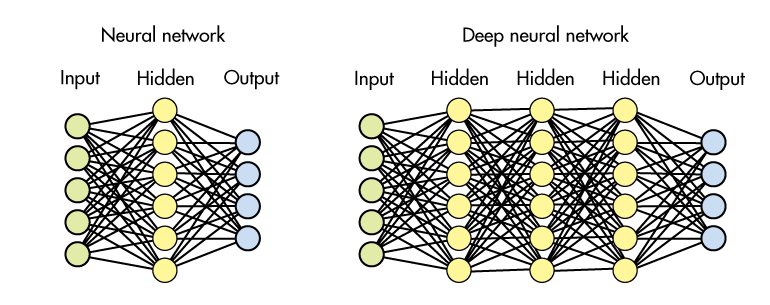

In [6]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncFashion = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncFashion.fit(X_train, y_train)
y_test_pred = mdlDncFashion.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1166
           1       0.99      0.98      0.99      1213
           2       0.83      0.76      0.79      1232
           3       0.89      0.90      0.90      1209
           4       0.81      0.83      0.82      1159
           5       0.96      0.95      0.96      1217
           6       0.72      0.72      0.72      1178
           7       0.93      0.95      0.94      1215
           8       0.97      0.96      0.96      1178
           9       0.95      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 2min 44s, sys: 1min 3s, total: 3min 48s
Wall time: 2min 21s


### Cross Validation

In [7]:
# Cross-validate model across 5 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlDncFashion, X, y, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([0.88416667, 0.88791667, 0.89191667, 0.89466667, 0.8895    ])

utexas_ds_orie_divider_gray.png